In [1]:
import numpy as np

This notebook was written to demonstrate Gradient Descent. It is not the most efficient way of doing things and in practice, make sure to use the built in methods to do it

Hopefully this will demonstrate things what is actually going on in .fit() and how it figures out the weights

This is for our old friend Linear Regression but others could be written similarly. As much as possible I am avoiding loops unless I think it will better demonstrate what's going on.

Firstly we need a function that calculates the error. I am using MSE

\begin{equation}
\frac{1}{2m}\sum (\widehat{y_i} - y_i)^2
\end{equation}

where $\widehat{y_i} = w_0+w_1x_1+w_2x_2+....$

In [2]:
def error(X,y,w):
    div = 2*len(y)
    return ((np.dot(X,w) - y)**2).sum()/div

Not the best way of doing things, but let's make a function for calculating the change for one particular $w_c$

c is the column number we're checking, the gradient for one particular one is
\begin{equation}
\frac{\partial L}{\partial w_c} = \frac{1}{m}\sum (\widehat{y_i}-y_i)*x_c
\end{equation}

which you should see reflected below

In [3]:
def grad(X,y,w,c):
    div = len(y)
    return (X[:, c]*(np.dot(X,w) - y)).sum()/div

Here's me writing a loop (usually you don't do this, it increases the computational time and when doing this training - every optimisation counts, but I think it will demonstrate things better)

full grad loops over all the weights, finds out the change for each individual w and puts it into an array

In [4]:
def loopfullgrad(X,y,w):
    allgrad = np.array([])
    for i in range(len(w)):
        allgrad = np.append(allgrad, grad(X,y,w,i))
    return allgrad   

In [5]:
#Here's a better one that doesn't use a loop so faster
def fullgrad(X,y,w):
    div = len(y)
    prediction = np.dot(X,w)
    allgrad = X.T.dot((prediction - y))/div
    return allgrad

The code for performing one step of gradient descent is done. Now let's set up the thing we want to find the best weights for.

Like sklearn, this requires each row in X correspond to one from the sample. If we want an intercept ($w_0$), we need to add that in with feature 0 being all 1

In [6]:
X = np.array([[1,2],[1,5],[1,8],[1,12]])

In [7]:
X

array([[ 1,  2],
       [ 1,  5],
       [ 1,  8],
       [ 1, 12]])

y is a 1-d as normal y[0] is the true value for X[0]

In [8]:
y = np.array([4,11,19,25])

In [9]:
y

array([ 4, 11, 19, 25])

We need to now pick initial weights to start with, there are two weights required

I've just picked 20 and 50. You could set this with random numbers or maybe try 0,0

In [10]:
w = np.array([20, 50])

How bad is the current model of 
\begin{equation}
\hat{y} = 20 + 50x
\end{equation}

In [11]:
error(X,y,w)

74420.375

Find the gradient now

In [12]:
onestep = loopfullgrad(X,y,w)
onestep

array([ 342.75, 2968.75])

In [13]:
onestep = fullgrad(X,y,w)
onestep

array([ 342.75, 2968.75])

We can see that
\begin{equation}
\nabla L = (342.75, 2968.75)
\end{equation}

Now update the weights using the learning rate of $\alpha=1$

\begin{equation}
\textbf{w}^1 = \textbf{w}^0 - \alpha*\nabla L
\end{equation}

In [14]:
alpha = 1

In [15]:
newweight = w - alpha*onestep
newweight

array([ -322.75, -2918.75])

In [16]:
error(X,y,newweight)

259169836.8671875

Ok, that was a terrible attempt! Our $\alpha$ is far too big. Let's try 0.01

In [17]:
alpha = 0.01

In [18]:
weight_1 = w - alpha*onestep
weight_1

array([16.5725, 20.3125])

In [19]:
error(X,y,weight_1)

11913.470811718747

An improvement! 

Let's do another step

In [20]:
weight_2 = weight_1 - alpha*fullgrad(X,y,weight_1)
weight_2

array([15.18318125,  8.4462    ])

In [21]:
error(X,y,weight_2)

1923.257547730489

There's no way of avoiding loops now, so let's do 50 steps and see where we are

In [22]:
weights = weight_2
for i in range(50):
    weights = weights - alpha*fullgrad(X,y,weights)
    print("Weights:", weights, ", error:", error(X,y,weights))

Weights: [14.60873094  3.70446177] , error: 326.492271589584
Weights: [14.36009246  1.81097883] , error: 71.20501095436816
Weights: [14.24175046  1.05616763] , error: 30.31903149997327
Weights: [14.17554164  0.75657015] , error: 23.699990551816963
Weights: [14.13021774  0.63895328] , error: 22.55802661361252
Weights: [14.09328622  0.59408376] , error: 22.291816152387437
Weights: [14.0597527   0.57829231] , error: 22.165953739761235
Weights: [14.02762044  0.57412081] , error: 22.06290192165977
Weights: [13.99609108  0.57458985] , error: 21.963873618182713
Weights: [13.96484536  0.57690922] , error: 21.865864474689154
Weights: [13.93375553  0.57996344] , error: 21.76839260866761
Weights: [13.90277045  0.5833066 ] , error: 21.671379297957742
Weights: [13.87186955  0.58676044] , error: 21.574810263022624
Weights: [13.84104452  0.59025368] , error: 21.478681531562327
Weights: [13.81029195  0.59375787] , error: 21.382990786324065
Weights: [13.77961038  0.59726163] , error: 21.28773598223626


still getting smaller, let's do some more but I'm going to break if the error flattens or increases

In [23]:
currenterror = error(X,y,weights)
for i in range(50):
    weights = weights - alpha*fullgrad(X,y,weights)
    newerror = error(X,y,weights)
    print("Weights:", weights, ", error:", newerror)
    if newerror >= currenterror:
        break

Weights: [12.74873521  0.71515345] , error: 18.213604035344517
Weights: [12.72047501  0.7183854 ] , error: 18.1327877881926
Weights: [12.69227924  0.72160999] , error: 18.05233971000584
Weights: [12.66414777  0.72482722] , error: 17.97225812354245
Weights: [12.63608046  0.72803712] , error: 17.892541359201534
Weights: [12.60807715  0.73123969] , error: 17.813187754988295
Weights: [12.5801377   0.73443497] , error: 17.734195656479347
Weights: [12.55226196  0.73762295] , error: 17.655563416788258
Weights: [12.52444979  0.74080367] , error: 17.577289396531192
Weights: [12.49670105  0.74397714] , error: 17.49937196379277
Weights: [12.46901558  0.74714336] , error: 17.42180949409197
Weights: [12.44139325  0.75030237] , error: 17.344600370348356
Weights: [12.4138339   0.75345417] , error: 17.267742982848272
Weights: [12.38633741  0.75659879] , error: 17.191235729211346
Weights: [12.35890362  0.75973623] , error: 17.115077014357038
Weights: [12.33153238  0.76286652] , error: 17.03926525047143

In [24]:
for i in range(5000):
    weights = weights - alpha*fullgrad(X,y,weights)
    newerror = error(X,y,weights)
    print("Weights:", weights, ", error:", newerror)
    if newerror >= currenterror:
        break

Weights: [11.41186502  0.86804356] , error: 14.592613116262225
Weights: [11.38665343  0.87092686] , error: 14.528292765993875
Weights: [11.36149933  0.87380359] , error: 14.464265435478765
Weights: [11.3364026   0.87667376] , error: 14.400529789827129
Weights: [11.31136309  0.87953738] , error: 14.337084500230496
Weights: [11.28638069  0.88239447] , error: 14.273928243933957
Weights: [11.26145526  0.88524505] , error: 14.21105970420857
Weights: [11.23658666  0.88808913] , error: 14.148477570323932
Weights: [11.21177478  0.89092672] , error: 14.086180537520852
Weights: [11.18701948  0.89375784] , error: 14.024167306984111
Weights: [11.16232063  0.89658251] , error: 13.962436585815455
Weights: [11.1376781   0.89940073] , error: 13.900987087006559
Weights: [11.11309177  0.90221252] , error: 13.839817529412253
Weights: [11.08856151  0.90501791] , error: 13.778926637723778
Weights: [11.06408719  0.9078169 ] , error: 13.718313142442222
Weights: [11.03966867  0.9106095 ] , error: 13.657975779

I'm curious, what does sklearn get?

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression(fit_intercept=False)

fit_intercept is set to false as we already have the intercept included. (The columns of 1)

In [27]:
model.fit(X,y)

LinearRegression(fit_intercept=False)

In [28]:
model.coef_

array([0.35616438, 2.13242009])

Close! They spent a lot more time writing better code

I want to do more stuff but I'm writing a function now

In [29]:
import matplotlib.pyplot as plt

In [30]:
def getcoefficients(X,y,w,alpha,epochs=500,printing=False, plotting=False, showall=False):
    weights = w
    currenterror = error(X,y,w)
    if plotting:
        recorderrors = []
        recorderrors.append(currenterror)
        maxepoch=0
    for i in range(epochs):
        weights = weights - alpha*fullgrad(X,y,weights)
        if printing:
            print("Step:", i, "Weights:", weights, ", error:", error(X,y,weights))
        #if error(X,y,weights) >= currenterror:
        #    break
        currenterror = error(X,y,weights)
        if plotting:
            maxepoch +=1
            recorderrors.append(currenterror)
    if plotting:
        fig,ax = plt.subplots(figsize=(12,8))

        ax.set_ylabel('MSE')
        ax.set_xlabel('Iterations')
        _=ax.plot(range(maxepoch+1),recorderrors,'b.')
        if not showall:
            ax.set_ylim(0, min(recorderrors)+20)
    return weights

Another thing to see, what happens if we pick completely different weights

In [31]:
w = np.array([-20, 200])

In [32]:
getcoefficients(X,y,w,0.01,10000,True)

Step: 0 Weights: [-33.1525  84.1375] , error: 181236.87581171875
Step: 1 Weights: [-38.35275625  37.811325  ] , error: 29139.45226704825
Step: 2 Weights: [-40.37399313  19.28442598] , error: 4829.787718598396
Step: 3 Weights: [-41.12445195  11.87114812] , error: 943.7261847437571
Step: 4 Weights: [-41.36700993   8.90089337] , error: 321.85792516350455
Step: 5 Weights: [-41.40665013   7.70688722] , error: 221.6908910783225
Step: 6 Weights: [-41.36529852   7.22300542] , error: 204.9079733987772
Step: 7 Weights: [-41.2916984    7.02303236] , error: 201.45539554397214
Step: 8 Weights: [-41.2053361    6.93657533] , error: 200.1368400071467
Step: 9 Weights: [-41.11400157   6.89551463] , error: 199.16284629247866
Step: 10 Weights: [-41.02080879   6.87261732] , error: 198.247399071748
Step: 11 Weights: [-40.92700237   6.85699615] , error: 197.3447702818442
Step: 12 Weights: [-40.83307959   6.84429859] , error: 196.44763569512233
Step: 13 Weights: [-40.73923895   6.83278455] , error: 195.554809

array([0.35616438, 2.13242009])

I had put in the ability to plot too so why not plot the error

array([0.35616438, 2.13242009])

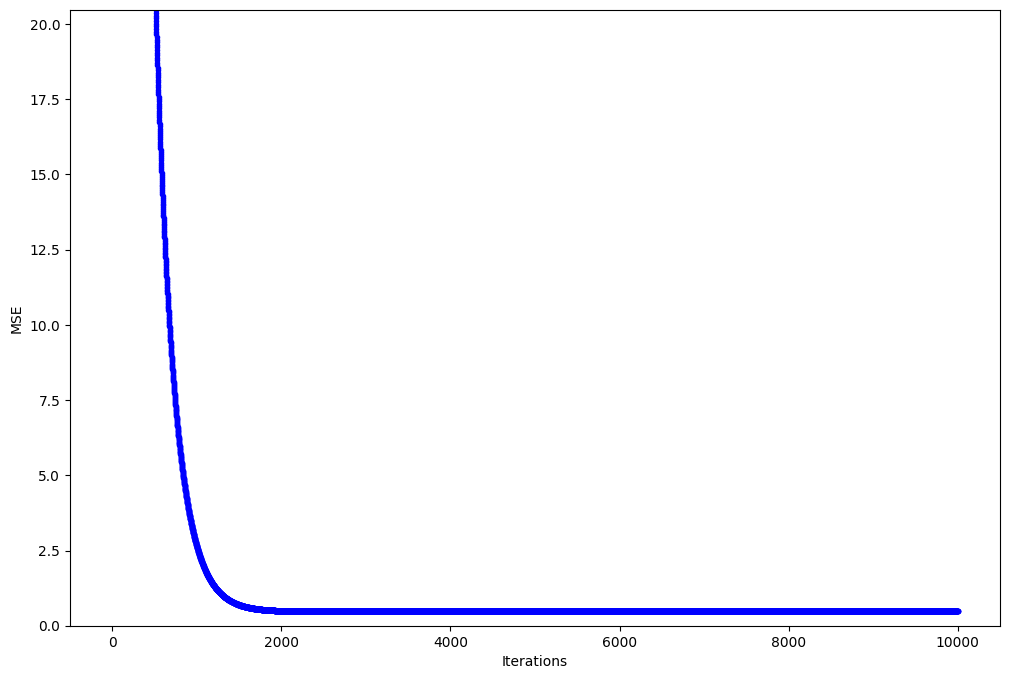

In [33]:
getcoefficients(X,y,w,0.01,10000,False, True)

It should hopefully still get there

With more complicated functions it might get "stuck" in one of those valleys like I said in class but thankfully this example does not

What did the graph look like with the [20,50] initial weights

array([0.35631862, 2.13240245])

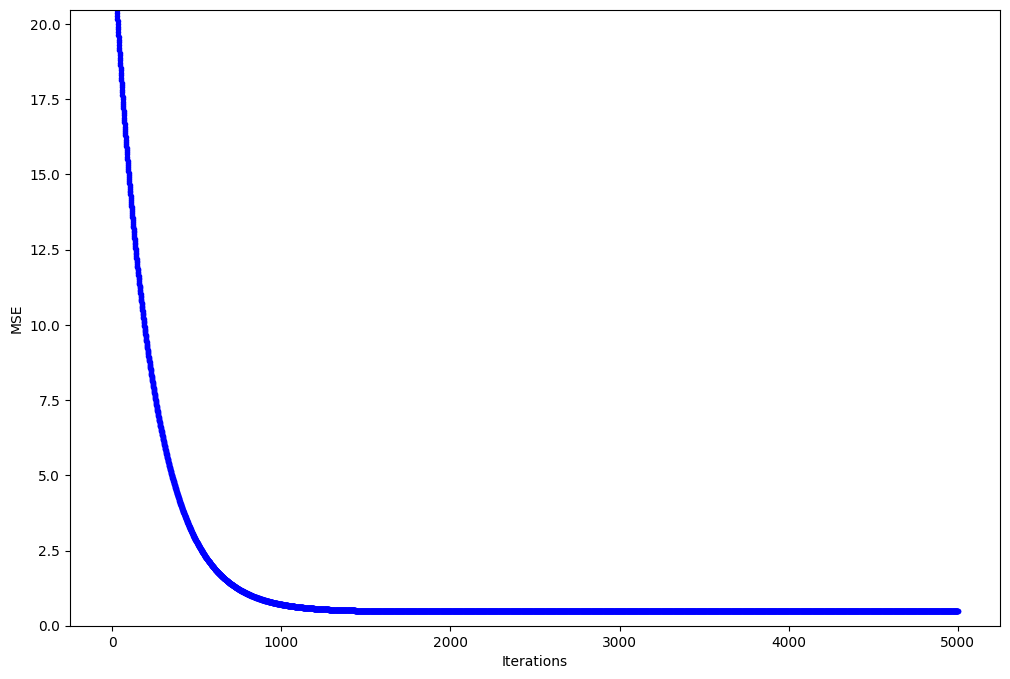

In [34]:
getcoefficients(X,y,np.array([20,50]),0.01,5000, False, True)

The error got smaller at an earlier epoch

Other ML systems will use the idea of changing the learning rate every so often (Neural Networks with solver=adam does this), so it gets an initial kick with a higher learning rate to start, then when it pleateaus - it shrinks the learning rate to try and learn some more, etc.

Now let's see if it works with more features - It should as I wrote the functions to use numpy arrays

In [35]:
X = np.array([[1,5,8,2,6], [1,2,8,-10,23], [1,2,8,10,-23],
             [1,12,-2,5,23],[1,24,8,21,23],[1,53,4,6,12],[1,3,2,-5,-10]])

In [36]:
X.shape

(7, 5)

In [37]:
y = np.array([8,-3,4,10,1,6,12])

In [38]:
y.shape

(7,)

This time I'm setting the initial weights to be random numbers, hopefully it doesn't mess up below when you run it

In [39]:
w = np.random.uniform(size=5)

In [40]:
model = LinearRegression(fit_intercept=False)

In [41]:
model.fit(X,y)

LinearRegression(fit_intercept=False)

In [42]:
model.coef_

array([ 1.15677080e+01,  3.25267906e-03, -1.02505283e+00,  3.35661860e-02,
       -1.36555447e-01])

### My attempt

In [43]:
alpha=0.001

Any bigger alpha will fail

array([ 1.15676215e+01,  3.25390334e-03, -1.02504360e+00,  3.35656116e-02,
       -1.36555003e-01])

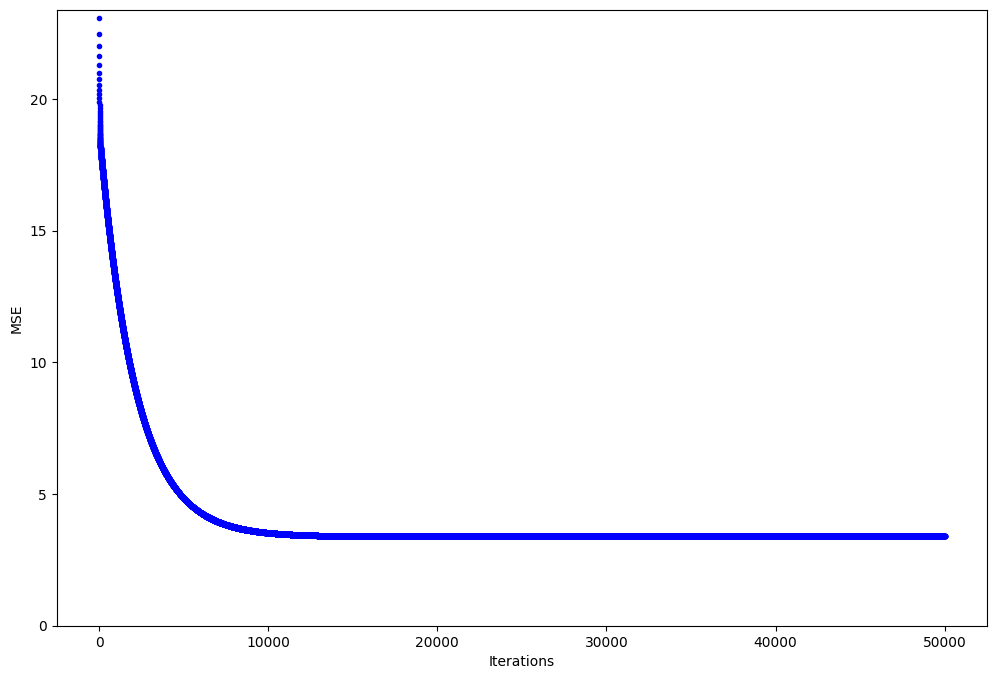

In [44]:
getcoefficients(X,y,w,0.001,50000,False,True)

Now you should see that the .fit function is not just magic. This is the basis of what it is doing and whenever you want an ML system to learn, it has to do lots of these "steps" to get the best model it can find.

Different models will use different error/lost/cost functions (Logistic Regressions uses the one I mentioned in class for example). You can control the number of epochs and the learning rates as these are hyperparameters. There are "fancier" gradient descent methods (such as Mini-batch Stochastic Gradient Descent) which makes things faster but still having good performance.

Neural Networks are much more complicated than linear regression, finding the gradient for them is even more so - but we'll come to that later.

## Cars Example
Let's try the age vs value cars example

In [45]:
x=np.array([5,4,6,5,5,5,6,6,2,7,7]).reshape(-1,1)
y=np.array([85,103,70,82,89,98,66,95,169,70,48])

We need to add the 1s for the intercept to our x

In [46]:
x

array([[5],
       [4],
       [6],
       [5],
       [5],
       [5],
       [6],
       [6],
       [2],
       [7],
       [7]])

In [47]:
onecolumn = np.ones([x.shape[0],1])
onecolumn

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [48]:
X = np.hstack((onecolumn, x))

In [49]:
X

array([[1., 5.],
       [1., 4.],
       [1., 6.],
       [1., 5.],
       [1., 5.],
       [1., 5.],
       [1., 6.],
       [1., 6.],
       [1., 2.],
       [1., 7.],
       [1., 7.]])

array([195.46846847, -20.26126126])

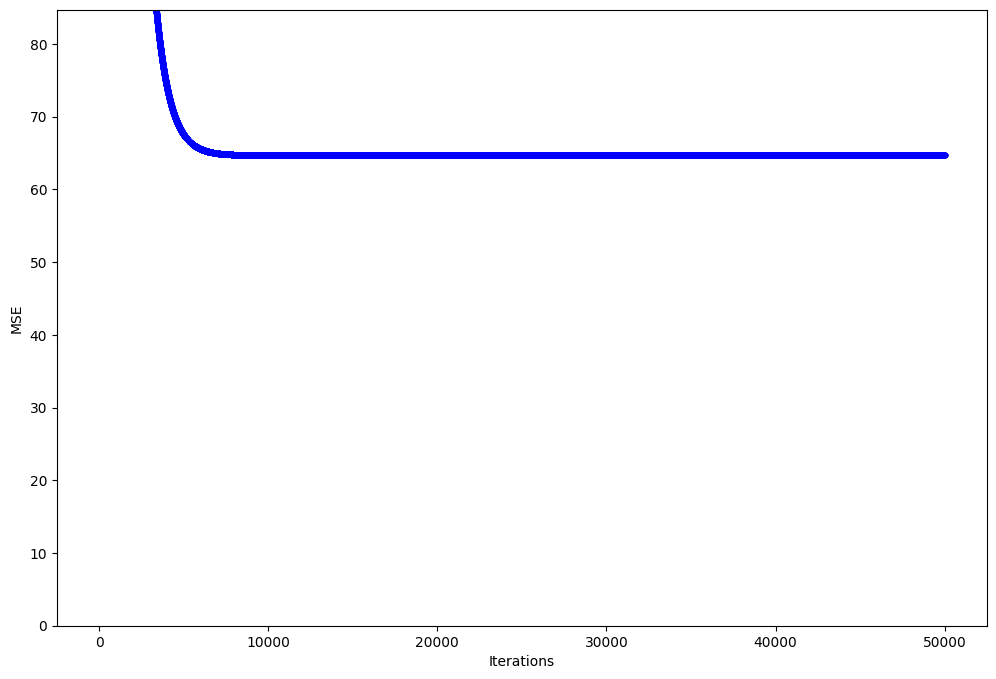

In [50]:
getcoefficients(X,y,np.random.uniform(size=2),0.01,50000,False,True)

In [51]:
model = LinearRegression()
model.fit(x,y)
print(model.intercept_, model.coef_[0])

195.46846846846847 -20.261261261261264


## Now let's try mtcars.csv

In [52]:
import pandas as pd

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [55]:
y = dfcars['mpg']
allX = dfcars.iloc[:, 2:]
from sklearn.model_selection import train_test_split
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

In [56]:
X_train = allX_train[["wt","hp","drat"]]

In [57]:
X_train = allX_train[["wt","hp","drat"]].values
X_test = allX_test[["wt","hp","drat"]].values


In [58]:
X_train

array([[  1.935,  66.   ,   4.08 ],
       [  3.73 , 180.   ,   3.07 ],
       [  2.62 , 110.   ,   3.9  ],
       [  3.44 , 175.   ,   3.15 ],
       [  5.345, 230.   ,   3.23 ],
       [  3.46 , 105.   ,   2.76 ],
       [  3.78 , 180.   ,   3.07 ],
       [  4.07 , 180.   ,   3.07 ],
       [  3.84 , 245.   ,   3.73 ],
       [  2.875, 110.   ,   3.9  ],
       [  2.32 ,  93.   ,   3.85 ],
       [  2.14 ,  91.   ,   4.43 ],
       [  3.215, 110.   ,   3.08 ],
       [  3.52 , 150.   ,   2.76 ],
       [  1.513, 113.   ,   3.77 ],
       [  3.435, 150.   ,   3.15 ],
       [  1.615,  52.   ,   4.93 ],
       [  2.78 , 109.   ,   4.11 ],
       [  2.465,  97.   ,   3.7  ],
       [  3.19 ,  62.   ,   3.69 ],
       [  3.44 , 123.   ,   3.92 ],
       [  5.25 , 205.   ,   2.93 ],
       [  3.17 , 264.   ,   4.22 ],
       [  1.835,  65.   ,   4.22 ],
       [  3.57 , 245.   ,   3.21 ]])

Let's scale this

In [59]:
X_train = StandardScaler().fit_transform(X_train)

In [60]:
X_train

array([[-1.26234592, -1.21810835,  0.86474409],
       [ 0.6147756 ,  0.64834799, -0.94426902],
       [-0.54600707, -0.49772169,  0.54234571],
       [ 0.31150805,  0.56648587, -0.80098086],
       [ 2.30366208,  1.4669692 , -0.65769269],
       [ 0.33242306, -0.57958381, -1.49951067],
       [ 0.6670631 ,  0.64834799, -0.94426902],
       [ 0.97033065,  0.64834799, -0.94426902],
       [ 0.72980811,  1.71255556,  0.23785836],
       [-0.27934078, -0.49772169,  0.54234571],
       [-0.85973211, -0.7760529 ,  0.45279061],
       [-1.04796714, -0.80879775,  1.49162982],
       [ 0.07621427, -0.49772169, -0.926358  ],
       [ 0.39516806,  0.15717527, -1.49951067],
       [-1.70365248, -0.44860442,  0.30950244],
       [ 0.3062793 ,  0.15717527, -0.80098086],
       [-1.59698596, -1.44732229,  2.38718087],
       [-0.37868704, -0.51409412,  0.91847715],
       [-0.70809834, -0.71056321,  0.1841253 ],
       [ 0.05007052, -1.28359805,  0.16621427],
       [ 0.31150805, -0.28488018,  0.578

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)
#model.score(X_test, y_test)

LinearRegression()

In [62]:
print(model.intercept_,model.coef_)

20.168 [-2.82706981 -2.22336158  0.94591045]


Now with our method. Initialise our weights randomely

In [63]:
w = np.random.uniform(size=4)
w

array([0.32733862, 0.58244679, 0.20385028, 0.4965084 ])

In [64]:
Xs = np.hstack((np.ones([allX_train[["wt","hp","drat"]].values.shape[0],1]), allX_train[["wt","hp","drat"]]))


In [65]:
Xs = np.hstack((np.ones([X_train.shape[0],1]), X_train))
Xs.shape

(25, 4)

In [66]:
ys = y_train.values

In [67]:
error(Xs,ys,w)

215.85768685847364

In [68]:
fullgrad(Xs, ys, w)

array([-19.84066138,   5.48209505,   5.09298255,  -3.94606543])

In [69]:
alpha = 1

In [70]:
w = w - alpha*fullgrad(Xs,ys,w)

In [71]:
w

array([20.168     , -4.89964827, -4.88913227,  4.44257382])

In [72]:
error(Xs,ys,w)

27.720155238907992

array([20.168     , -2.82706981, -2.22336158,  0.94591045])

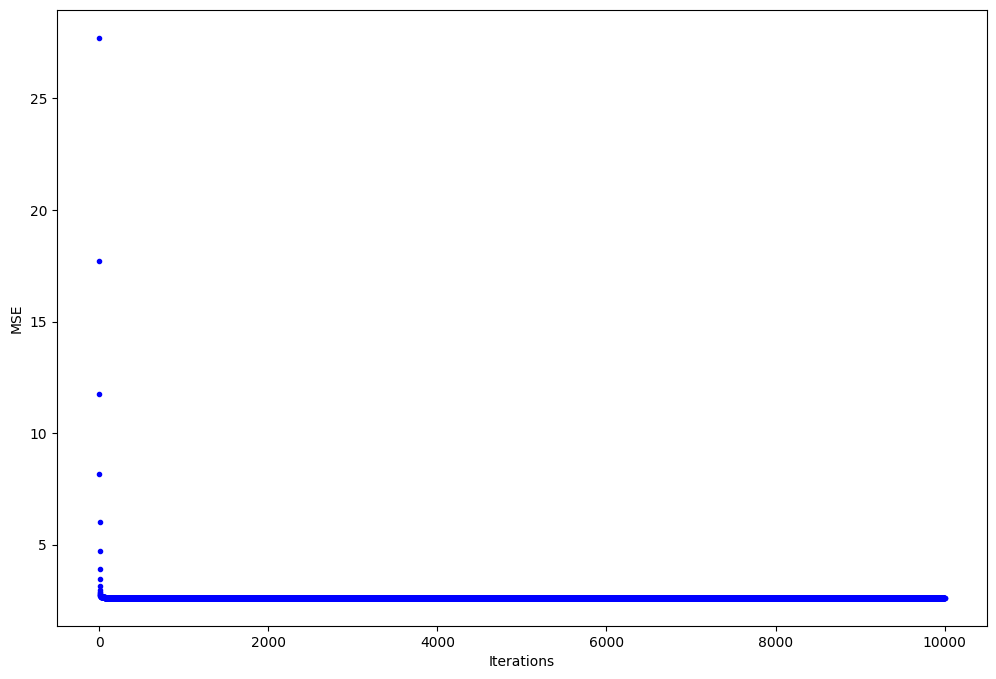

In [73]:
getcoefficients(Xs,ys,w,0.1,10000,False, True, showall=True)

The above should hopefully give you the idea of what's happening with the .fit method